# Teste cego para modelos do Achilles IA 

Estatística Descritiva

Métrcas

- Criação de pasta
- Concatenagem
- Melhores resultados
- Piores Resultados
- Classifição por parâmetro
        - R2
        - MAPE
        - RMSLE

Baseline

- Criação de pasta

In [32]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy.stats import norm

In [33]:
model_dir = "./models"
data_dir  = "./data/petrobras"

In [34]:
M = ['model_5', 'model_1', 'model_9', 'model_11', 'model_8', 'model_7']
D = ['dataset_A', 'dataset_B', 'dataset_C', 'dataset_D']

## Métricas

### Criação de pasta

In [35]:
# Categorização por Modelo/Poço

for i in M:
    dir = f"./results/petrobras/{i}"
    for j in D:
        data = f"{dir}/{j}"
        df = pd.read_csv(f"{data}/metrics_prediction_{j}.csv")
        df[["Modelo","Poço"]] = [i,j]                                  # Adição dos nomes de modelo e poço à planilha
        df.to_csv(f"stats/petrobras/metric/{i}:{j}.csv")

#### Concatenagem 

In [36]:
pasta = 'stats/petrobras/metric' 


arquivos_csv = [arq for arq in os.listdir(pasta) if arq.endswith('.csv')]


dataframes = []
for arquivo in arquivos_csv:
    caminho_completo = os.path.join(pasta, arquivo)
    df = pd.read_csv(caminho_completo)
    dataframes.append(df)
df_metricas = pd.concat(dataframes, ignore_index=True)


print(f"Total de arquivos concatenados: {len(arquivos_csv)}")
print(f"Shape do DataFrame final: {df_metricas.shape}")
df_metricas.to_csv("stats/petrobras/metricas.csv")

Total de arquivos concatenados: 44
Shape do DataFrame final: (88, 13)


##### Melhores resultados

In [37]:
#df_metricas = pd.read_csv("stats/petrobras/metricas.csv")

indices = {
    'R² máximo': df_metricas['R²_log'].idxmax(),
    'MAPE mínimo': df_metricas['MALE'].idxmin(),
    'MAE mínimo': df_metricas['MAE'].idxmin(),
    'RMSE mínimo': df_metricas['RMSE'].idxmin(),
    'RMSLE mínimo': df_metricas['RMSLE'].idxmin()
}
df_otimo = df_metricas.loc[list(set(indices.values()))].copy()

df_otimo['Métrica'] = df_otimo.index.map({v:k for k,v in indices.items()})

df_otimo = df_otimo.sort_values('Métrica')


print("Métricas ótimas encontradas:")
print(df_otimo.to_string(index=False))

Métricas ótimas encontradas:
 Unnamed: 0        Model   Dataset      R²  R²_log   RMSE    MAE   MALE  RMSLE     MAPE  N_points  Modelo      Poço      Métrica
          0 model_3_FFNN dataset_A  0.1230  0.2945 1.3613 0.9853 0.4196 0.5079 218.4247       103 model_3 dataset_A  RMSE mínimo
          1 model_7_FFNN dataset_C -0.5954 -1.2900 1.5219 1.1261 0.3465 0.4155  38.2161        22 model_7 dataset_C RMSLE mínimo
          0 model_5_FFNN dataset_A -0.0393  0.3573 1.4819 1.0051 0.4280 0.5285 145.1121       103 model_5 dataset_A    R² máximo


##### Piores resultados

In [38]:
r2_min = df_metricas[df_metricas["R²"] == df_metricas["R²"].min()].copy()
mape_max = df_metricas[df_metricas['MAPE'] == df_metricas['MAPE'].max()].copy()
mae_max = df_metricas[df_metricas['MAE'] == df_metricas['MAE'].max()].copy()
rmse_max = df_metricas[df_metricas['RMSE'] == df_metricas['RMSE'].max()].copy()
rmsle_max = df_metricas[df_metricas['RMSLE'] == df_metricas['RMSLE'].max()].copy()


r2_min['Métrica'] = 'R² mínimo'
mape_max['Métrica'] = 'MAPE máximo'
mae_max['Métrica'] = 'MAE máximo'
rmse_max['Métrica'] = 'RMSE máximo'
rmsle_max['Métrica'] = 'RMSLE máximo'


df_piores = pd.concat([r2_min, mape_max, mae_max, rmse_max, rmsle_max])


colunas = ['Métrica'] + [col for col in df_piores.columns if col != 'Métrica']
df_piores = df_piores[colunas]


print("Piores métricas encontradas:")
print(df_piores.to_string(index=False))

Piores métricas encontradas:
     Métrica  Unnamed: 0         Model   Dataset      R²  R²_log   RMSE    MAE   MALE  RMSLE     MAPE  N_points   Modelo      Poço
   R² mínimo           1 model_11_FFNN dataset_C -3.3438 -4.1795 2.5113 1.8211 0.5792 0.7208  67.6367        22 model_11 dataset_C
 MAPE máximo           0   model_9_XGB dataset_A -0.1941 -0.0499 1.5885 1.2803 0.5550 0.6137 364.2201       103  model_9 dataset_A
  MAE máximo           1  model_9_FFNN dataset_C -3.2607 -3.5119 2.4871 1.9740 0.5230 0.6086  86.0307        22  model_9 dataset_C
 RMSE máximo           1 model_11_FFNN dataset_C -3.3438 -4.1795 2.5113 1.8211 0.5792 0.7208  67.6367        22 model_11 dataset_C
RMSLE máximo           1  model_9_FFNN dataset_B -0.6358 -0.5065 2.4748 1.6746 0.6144 0.7735 310.3450       258  model_9 dataset_B


## Estatística Descritiva

/tmp/ipykernel_89374/268649784.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax2.plot(x, p * scale_factor, 'k', linewidth=0.5, label='Distribuição Normal', color="darkred")


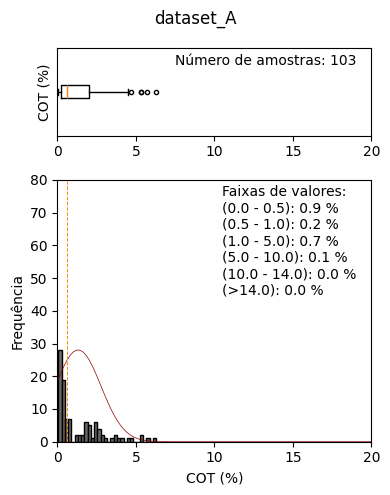

/tmp/ipykernel_89374/268649784.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax2.plot(x, p * scale_factor, 'k', linewidth=0.5, label='Distribuição Normal', color="darkred")


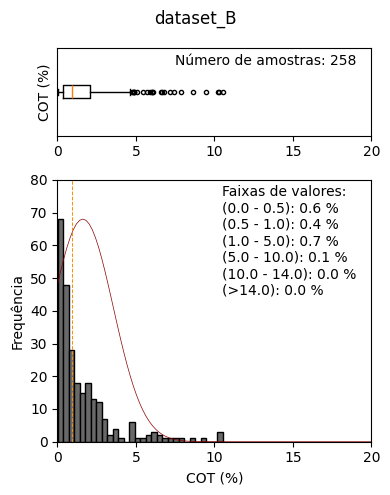

/tmp/ipykernel_89374/268649784.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax2.plot(x, p * scale_factor, 'k', linewidth=0.5, label='Distribuição Normal', color="darkred")


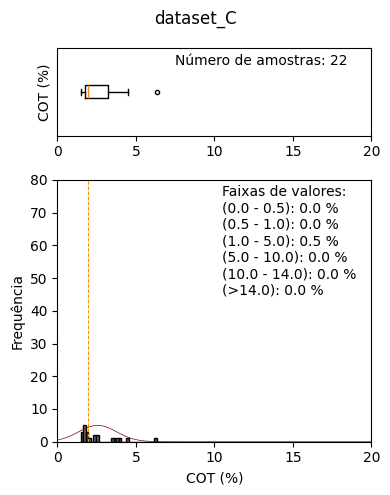

/tmp/ipykernel_89374/268649784.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax2.plot(x, p * scale_factor, 'k', linewidth=0.5, label='Distribuição Normal', color="darkred")


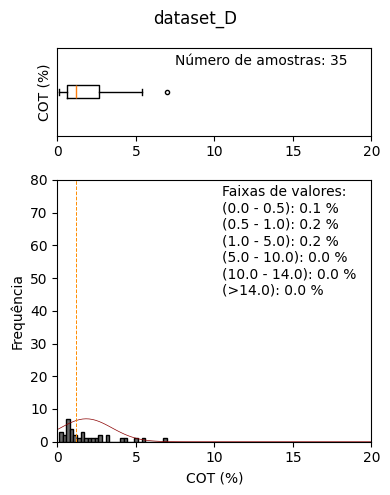

In [39]:
for i in D:
    df_data = pd.read_csv(f"./data/petrobras/{i}.csv")#.dropna()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 5), gridspec_kw={'height_ratios': [1, 3]})

    # Boxplot na parte superior
    ax1.boxplot(df_data["COT"].dropna(), vert=False, flierprops=dict(markersize=3))
    ax1.set(xlabel='', yticks=[], ylabel='COT (%)')
    ax1.set(xlim=(0,20))

    # Histograma na parte inferior
    ax2.hist(df_data["COT"], bins=30, edgecolor='black', color="dimgray")
    ax2.set_xlabel('COT (%)')
    ax2.set_ylabel('Frequência')
    ax2.set(xlim=(0,20), ylim=(0,80))

   

    # Calcular e plotar curva de distribuição normal
    # Calcular e plotar curva de distribuição normal (apenas se houver dados válidos)
    clean_data = df_data["COT"][np.isfinite(df_data["COT"])]
    if len(clean_data) > 0:
        try:
            mu, std = norm.fit(clean_data)
            xmin, xmax = ax2.get_xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std)

            # Escalar a curva para corresponder ao histograma
            counts, _ = np.histogram(clean_data, bins=30)
            scale_factor = max(counts) / max(p)
            ax2.plot(x, p * scale_factor, 'k', linewidth=0.5, label='Distribuição Normal', color="darkred")
        except Exception as e:
            print(f"Não foi possível ajustar a curva normal: {e}")
    # Adicionar linha vertical para a mediana
    median = np.median(clean_data)
    ax2.axvline(median, color='darkorange', linestyle='--', linewidth=0.7, label=f'Mediana: {median:.2f}')

    #Classes de COT por faixas de valores
    n_amostra=len(df_data["COT"].dropna())
    class1 = (len(df_data[(df_data['COT'] >= 0) & (df_data['COT'] <= 0.5)])/len(df_data["COT"]))*100
    class2 = (len(df_data[(df_data['COT'] > 0.5) & (df_data['COT'] <= 1.0)])/len(df_data["COT"]))*100
    class3 = (len(df_data[(df_data['COT'] > 1.0) & (df_data['COT'] <= 5.0)])/len(df_data["COT"]))*100
    class4 = (len(df_data[(df_data['COT'] > 5.0) & (df_data['COT'] <= 10)])/len(df_data["COT"]))*100
    class5 = (len(df_data[(df_data['COT'] > 10) & (df_data['COT'] <= 14)])/len(df_data["COT"]))*100
    class6 = (len(df_data[df_data['COT'] > 14])/len(df_data["COT"]))*100
    
    # Faixa de profundidade do poço
    prof_min = df_data["DEPTH"].min()
    prof_max = df_data["DEPTH"].max()

    plt.suptitle(f'{i}')
    plt.tight_layout()
    #plt.text(11,170, f"Profundidade: {prof_min} - {prof_max}")
    plt.text(7.5, 115, f"Número de amostras: {n_amostra}")
    plt.text(10.5,75, "Faixas de valores:")
    plt.text(10.5,70, f"(0.0 - 0.5): {round(class1,1)} %")
    plt.text(10.5,65, f"(0.5 - 1.0): {round(class2,1)} %")
    plt.text(10.5,60, f"(1.0 - 5.0): {round(class3,1)} %")
    plt.text(10.5,55, f"(5.0 - 10.0): {round(class4,1)} %")
    plt.text(10.5,50, f"(10.0 - 14.0): {round(class5,1)} %")
    plt.text(10.5,45, f"(>14.0): {round(class6,1)} %")
    plt.savefig(f"stats/petrobras/fig/{i}.png", bbox_inches='tight', dpi=300)
    plt.show()
    #print(prof_min, prof_max)

/tmp/ipykernel_89374/108569535.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(d)#,rotation=45)
/tmp/ipykernel_89374/108569535.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(d)#,rotation=45)
/tmp/ipykernel_89374/108569535.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(d)#,rotation=45)
/tmp/ipykernel_89374/108569535.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(d)#,rotation=45)
/tmp/ipykernel_89374/108569535.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xtic

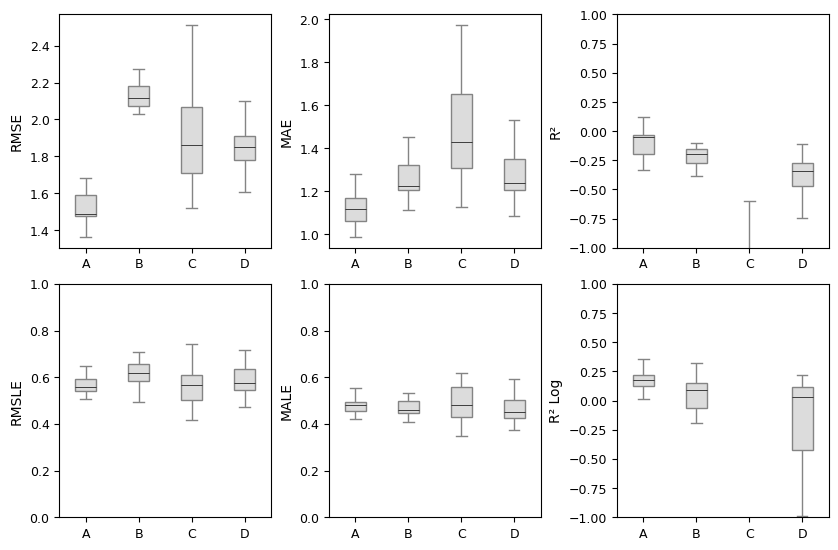

In [40]:
d=["A","B","C","D"]
a4_width = 8.27  # inches
a4_height = 11.69  # inches

fig = plt.figure(figsize=(a4_width, a4_height), layout='constrained')

L1 = GridSpec(4,3, figure=fig, width_ratios=[1,1,1], height_ratios=[1,1,1,1.7])

ax1=fig.add_subplot(L1[0,1]) #==== MAE ======#
ax2=fig.add_subplot(L1[0,2]) #==== R2 ======#
ax3=fig.add_subplot(L1[0,0]) #==== RMSE ======#
ax4=fig.add_subplot(L1[1,1]) #==== MALE ======#
ax5=fig.add_subplot(L1[1,2]) #==== R2 log ======#
ax6=fig.add_subplot(L1[1,0]) #==== RMSLE ======#

sns.boxplot(y = "MAE", x="Poço", data=df_metricas, order=D, ax=ax1, width=0.4, color="gainsboro", showfliers=False,   medianprops=dict(color='black', linewidth=0.5))
sns.boxplot(y = "R²", x="Poço", data=df_metricas, order=D, ax=ax2, width=0.4, color="gainsboro", showfliers=False,    medianprops=dict(color='black', linewidth=0.5))
sns.boxplot(y = "RMSE", x="Poço", data=df_metricas, order=D, ax=ax3, width=0.4, color="gainsboro", showfliers=False,  medianprops=dict(color='black', linewidth=0.5))
sns.boxplot(y = "MALE", x="Poço", data=df_metricas,order=D, ax=ax4, width=0.4, color="gainsboro", showfliers=False,   medianprops=dict(color='black', linewidth=0.5))
sns.boxplot(y = "R²_log", x="Poço", data=df_metricas,order=D, ax=ax5, width=0.4, color="gainsboro", showfliers=False, medianprops=dict(color='black', linewidth=0.5))
sns.boxplot(y = "RMSLE", x="Poço", data=df_metricas, order=D, ax=ax6, width=0.4, color="gainsboro", showfliers=False, medianprops=dict(color='black', linewidth=0.5))

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('')
ax6.set_xlabel('')

ax1.set_ylabel("MAE", fontsize="10")
ax2.set_ylabel("R²", fontsize="10")
ax3.set_ylabel("RMSE", fontsize="10")
ax4.set_ylabel("MALE", fontsize="10")
ax5.set_ylabel("R² Log", fontsize="10")
ax6.set_ylabel("RMSLE", fontsize="10")

ax1.tick_params(axis='y', labelsize=9)
ax2.tick_params(axis='y', labelsize=9)
ax3.tick_params(axis='y', labelsize=9)
ax4.tick_params(axis='y', labelsize=9)
ax5.tick_params(axis='y', labelsize=9)
ax6.tick_params(axis='y', labelsize=9)

ax1.tick_params(axis='x', labelsize=9)
ax2.tick_params(axis='x', labelsize=9)
ax3.tick_params(axis='x', labelsize=9)
ax4.tick_params(axis='x', labelsize=9)
ax5.tick_params(axis='x', labelsize=9)
ax6.tick_params(axis='x', labelsize=9)

ax2.set_ylim(-1,1)
ax4.set_ylim(0,1)
ax5.set_ylim(-1,1)
ax6.set_ylim(0,1)

ax1.set_xticklabels(d)#,rotation=45)
ax2.set_xticklabels(d)#,rotation=45)
ax3.set_xticklabels(d)#,rotation=45)
ax4.set_xticklabels(d)#,rotation=45)
ax5.set_xticklabels(d)#,rotation=45)
ax6.set_xticklabels(d)#,rotation=45)

plt.savefig("stats/petrobras/fig/Métricas_dataset.png", bbox_inches='tight', dpi=300)

### Boxplos para dados baseados na planilha de controle

/tmp/ipykernel_89374/2591118395.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)
/tmp/ipykernel_89374/2591118395.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)
/tmp/ipykernel_89374/2591118395.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)
/tmp/ipykernel_89374/2591118395.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)


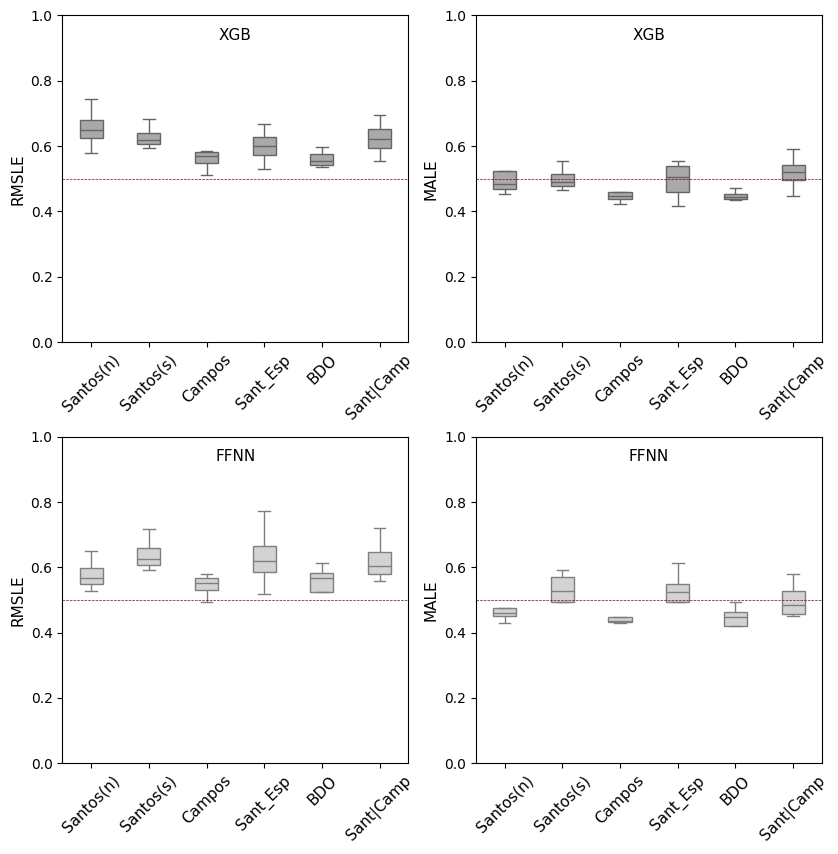

In [41]:
model = ["XGB","FFNN"]
n = ["5","1","9","11","8","7"]
m = ["Santos(n)","Santos(s)","Campos","Sant_Esp","BDO","Sant|Camp"]
# Criando listas completas de nomes de modelos
xgb_models = [f'model_{i}_XGB' for i in n]
ffnn_models = [f'model_{i}_FFNN' for i in n]

# Filtrando o DataFrame
df_xgb = df_metricas[df_metricas['Model'].isin(xgb_models)]
df_ffnn = df_metricas[df_metricas['Model'].isin(ffnn_models)]

#====================== GRÁFICOS ===================================#

a4_width = 8.27  # inches
a4_height = 11.69  # inches

fig = plt.figure(figsize=(a4_width, a4_height), layout='constrained')

L1 = GridSpec(3,2, figure=fig, width_ratios=[1,1], height_ratios=[1,1,1])

ax1=fig.add_subplot(L1[0,0]) 
ax2=fig.add_subplot(L1[0,1])
#ax3=fig.add_subplot(L1[0,2])
ax4=fig.add_subplot(L1[1,0]) 
ax5=fig.add_subplot(L1[1,1]) 
#ax6=fig.add_subplot(L1[1,2]) 


sns.boxplot(y = "RMSLE", x="Modelo", data=df_xgb, ax=ax1, color="darkgray", width=0.4, showfliers=False)#, order=["Modelo" for i in m])
sns.boxplot(y = "MALE", x="Modelo", data=df_xgb, ax=ax2, color="darkgray", width=0.4, showfliers=False)#, order=["Modelo" for i in m])
#sns.boxplot(y = "R²_log", x="Modelo", data=df_xgb, ax=ax3, color="steelblue", width=0.4, showfliers=False)#, order=["Modelo" for i in m])
sns.boxplot(y = "RMSLE", x="Modelo", data=df_ffnn, ax=ax4, color="lightgray", width=0.4, showfliers=False)#, order=["Modelo" for i in m])
sns.boxplot(y = "MALE", x="Modelo", data=df_ffnn, ax=ax5, color="lightgray", width=0.4, showfliers=False)#, order=["Modelo" for i in m])
#sns.boxplot(y = "R²_log", x="Modelo", data=df_ffnn, ax=ax6, color="peru", width=0.4, showfliers=False)#,order=["Modelo" for i in m])

ax1.set_xlabel('XGB')
ax2.set_xlabel('XGB')
#ax3.set_xlabel('XGB')
ax4.set_xlabel('FFNN')
ax5.set_xlabel('FFNN')
#ax6.set_xlabel('FFNN')

ax1.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)
ax2.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)
#ax3.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)
ax4.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)
ax5.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)
#ax6.set_xticklabels(m,rotation=45, fontsize=11)#,rotation=45)

ax1.set_xlabel('',  fontsize=11)
ax2.set_xlabel('',  fontsize=11)
#ax3.set_xlabel('',  fontsize=11)
ax4.set_xlabel('', fontsize=11)
ax5.set_xlabel('', fontsize=11)
#ax6.set_xlabel('', fontsize=11)

ax1.set_ylabel("RMSLE", fontsize=11)
ax2.set_ylabel("MALE", fontsize=11)
#ax3.set_ylabel("R²_log", fontsize="11")
ax4.set_ylabel("RMSLE", fontsize=11)
ax5.set_ylabel("MALE", fontsize=11)
#ax6.set_ylabel("R²_log", fontsize="11")

ax1.set_title('XGB',  fontsize=11, y=0.9)
ax2.set_title('XGB',  fontsize=11, y=0.9)
#ax3.set_title('XGB',  fontsize=11, y=0.9)
ax4.set_title('FFNN',  fontsize=11, y=0.9)
ax5.set_title('FFNN',  fontsize=11, y=0.9)
#ax6.set_title('FFNN',  fontsize=11, y=0.9)

ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
#ax3.set_ylim(-1,1)
ax4.set_ylim(0,1)
ax5.set_ylim(0,1)
#ax6.set_ylim(-1,1)

ax1.axhline(y=0.5, color="darkred", linewidth=0.5, linestyle="--")
ax2.axhline(y=0.5, color="darkred", linewidth=0.5, linestyle="--")
#ax3.axhline(y=0.5, color="darkred", linewidth=0.5, linestyle="--")
ax4.axhline(y=0.5, color="darkred", linewidth=0.5, linestyle="--")
ax5.axhline(y=0.5, color="darkred", linewidth=0.5, linestyle="--")
#ax6.axhline(y=0.5, color="darkred", linewidth=0.5, linestyle="--")

plt.savefig("stats/petrobras/fig/Métricas_modelos.png", bbox_inches='tight', dpi=300)

/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d, fontsize=8)
/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d, fontsize=8)
/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d, fontsize=8)
/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d, fontsize=8)
/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

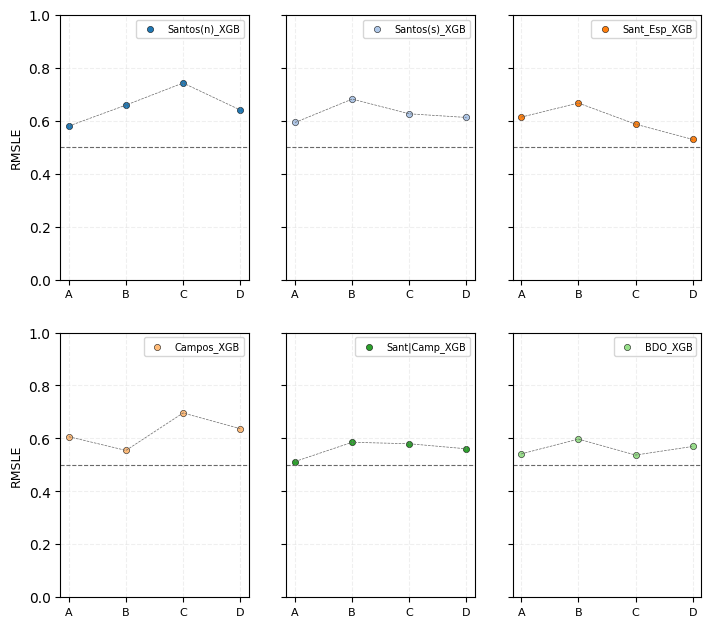

/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d, fontsize=8)
/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d, fontsize=8)
/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d, fontsize=8)
/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(d, fontsize=8)
/tmp/ipykernel_89374/2607693988.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(

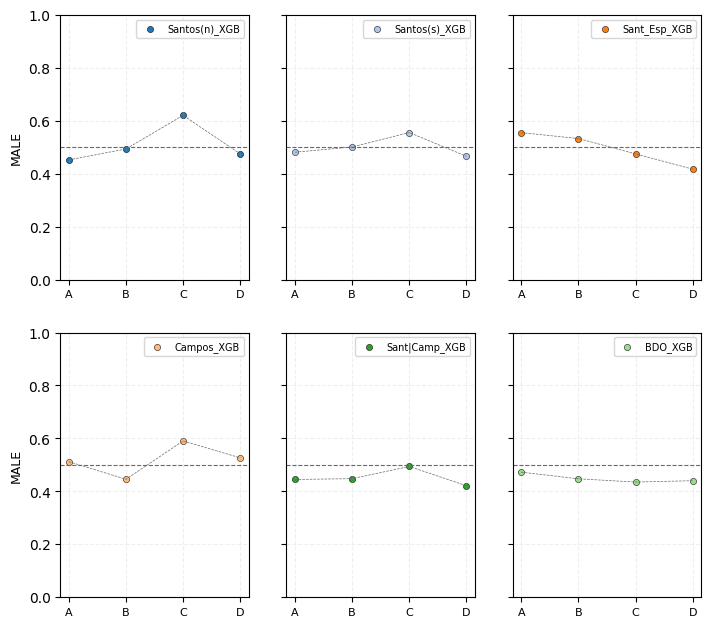

In [44]:
# Configurações do papel A4 em polegadas
a4_width = 8.27
a4_height = 11.69
name = ["Santos(n)","Santos(s)","Sant_Esp", "Campos","Sant|Camp","BDO"]

metrics = ["RMSLE","MALE"]
for a in metrics:
    # Definir a ordem dos poços
    D = ['dataset_A', 'dataset_B', 'dataset_C', 'dataset_D']
    df_metricas['Poço'] = pd.Categorical(df_metricas['Poço'], categories=D, ordered=True)

    # Criar figura A4
    fig = plt.figure(figsize=(a4_width, a4_height), layout='constrained')

    # Calcular número de linhas necessárias (3 gráficos por linha)
    n_models = len(M)
    n_cols = 3
    n_rows = (n_models + 3) // n_cols  # Arredonda para cima

    # Criar grid
    grid = GridSpec(n_rows, n_cols, figure=fig, hspace=0.2, wspace=0.2)

    # Paleta de cores
    palette = sns.color_palette("tab20", len(M))

    # Plotar cada modelo em seu próprio subplot
    for idx, i in enumerate(M):
        m = f"{i}_XGB"
        mod = df_metricas[df_metricas["Model"] == m]
        # Determinar posição no grid
        row = idx // n_cols
        col = idx % n_cols
        ax = fig.add_subplot(grid[row, col])
        
        # Gráfico de linha com pontos
        sns.lineplot(y=f"{a}", x="Poço", data=mod, 
                    color="dimgray", linewidth=0.5, ax=ax, linestyle="--")
        sns.scatterplot(y=f"{a}", x="Poço", data=mod, 
                       color=palette[idx], s=20, edgecolor='black', 
                       label=name[idx]+"_XGB", ax=ax)
        
        # Configurações do subplot
        ax.set_xlabel('')
        
        # MOSTRAR LABEL E NÚMEROS APENAS NAS POSIÇÕES [0,0] E [1,1]
        if (row == 0 and col == 0) or (row == 1 and col == 0):
            ax.set_ylabel(f"{a}", fontsize=9)
            ax.tick_params(axis='y', which='both', labelleft=True)  # Mostrar números no eixo y
        else:
            ax.set_ylabel('')  # Remover label do eixo y
            ax.tick_params(axis='y', which='both', labelleft=False)  # Ocultar números do eixo y
        
        if a == "R²_log":
            ax.set_ylim(-1, 1)
        else:
            ax.set_ylim(0, 1)
        
        ax.tick_params(axis='x')
        ax.grid(True, linestyle='--', alpha=0.2)
        
        # Legenda
        ax.legend(loc='best', fontsize=7)
        
        ax.set_xticklabels(d, fontsize=8)
        ax.axhline(y=0.5, color="dimgray", linestyle="--", linewidth=0.8)

    # Remover subplots vazios se houver
    for idx in range(len(M), n_rows * n_cols):
        fig.delaxes(fig.add_subplot(grid[idx // n_cols, idx % n_cols]))

    # Ajustar layout
    plt.tight_layout(pad=1.0)

    # Salvar em PDF
    plt.savefig("stats/petrobras/fig/Métricas_modelos_amostras.png", bbox_inches='tight', dpi=300)
    plt.show()